In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mrcfile
import torch

from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
from cryoS2Sdrop.dataloader import singleCET_dataset, singleCET_FourierDataset

from cryoS2Sdrop.analyze import *
from cryoS2Sdrop.deconvolution import tom_deconv_tomo

import tomopy.sim.project as proj
from tomopy.recon.algorithm import recon
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

def standardize(X):
    mean = X.mean()
    std = X.std()
    new_X = (X - mean) / std

    return new_X

def clip(X, low=0.005, high=0.995):
    # works with tensors =)
    return np.clip(X, np.quantile(X, low), np.quantile(X, high))

/home/ubuntu/Thesis/miniconda3/envs/jero/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/shrec2021_model4_gtDummy.mrc') 
denoised = read_array(p)
denoised = clip(denoised)
denoised = scale(denoised)

In [14]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/shrec2021_model4_dummy.mrc') 
raw = read_array(p)
raw = clip(raw)
raw = scale(raw)

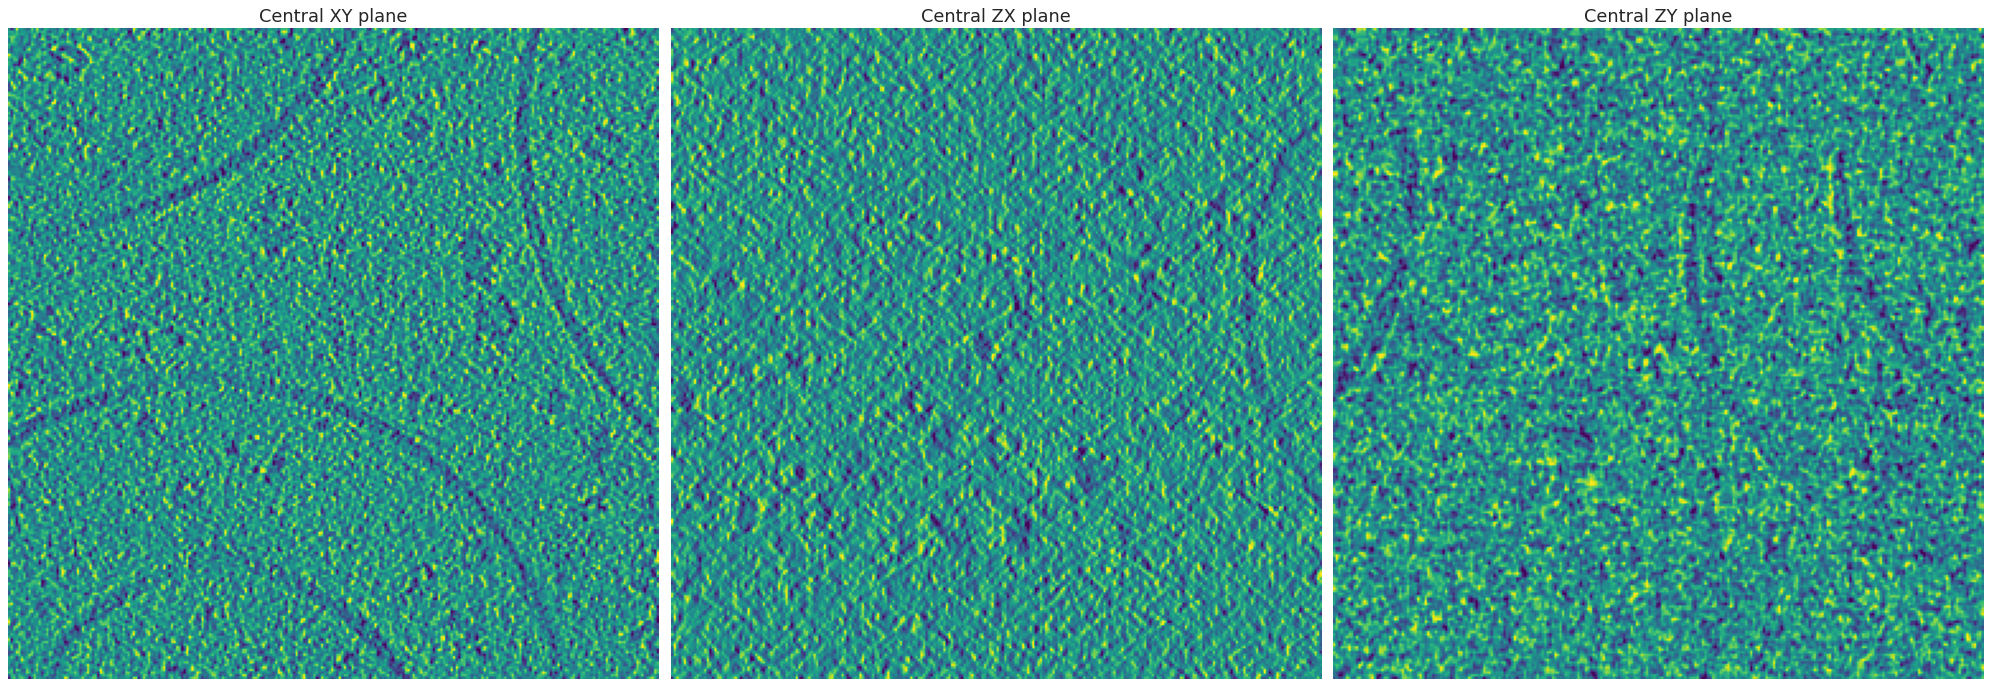

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [15]:
plot_centralSlices(raw, True)

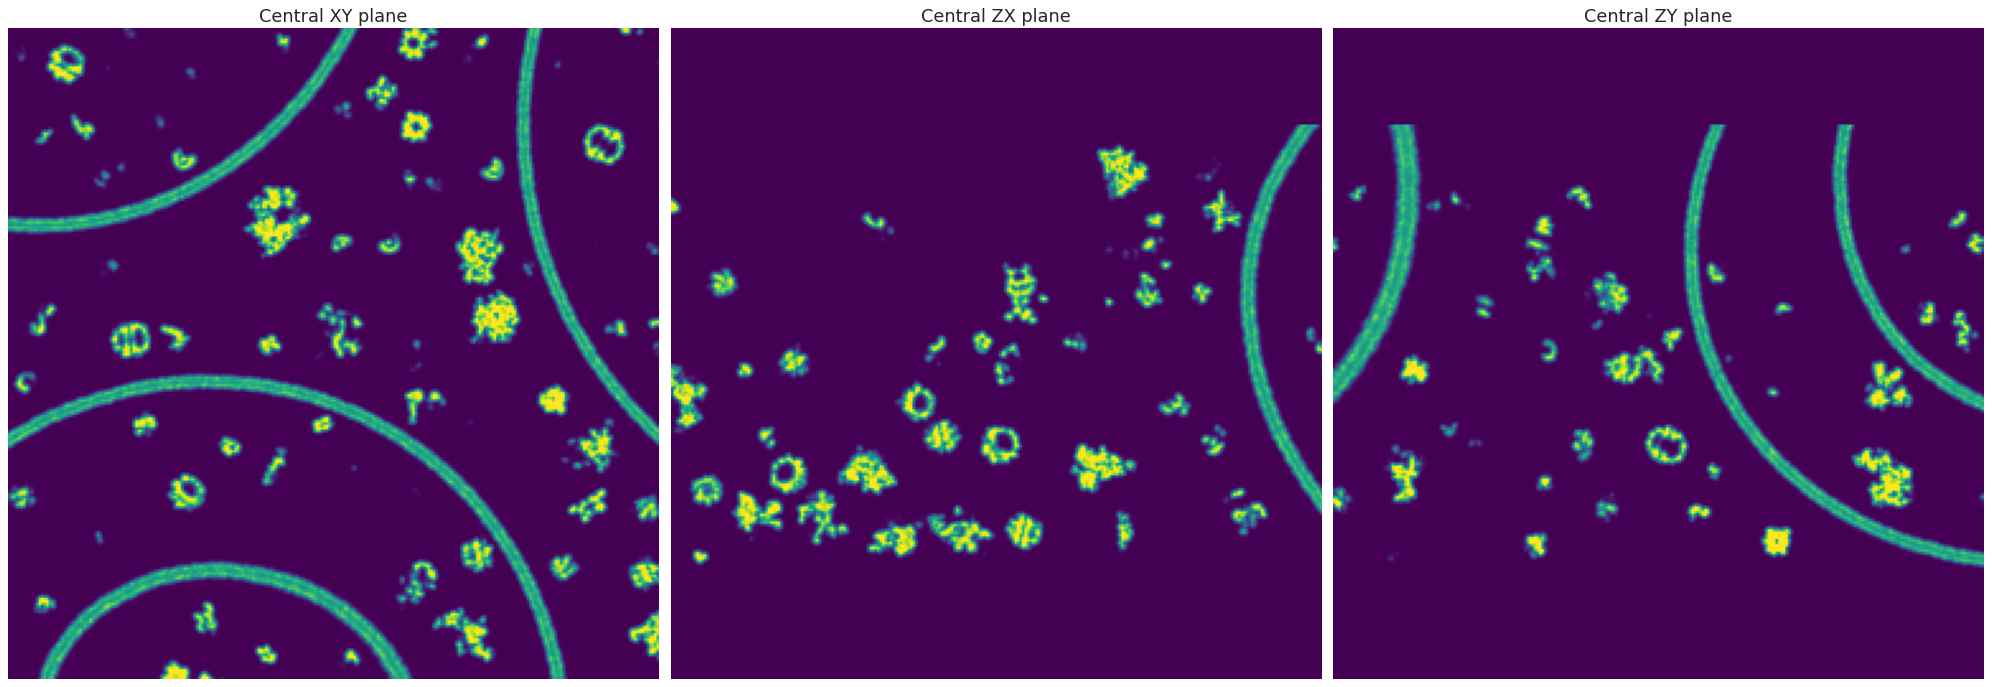

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [19]:
plot_centralSlices(denoised, True)

In [17]:
_ssim = ssim(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)

_psnr = peak_signal_noise_ratio(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)
_ssim, _psnr

(tensor(-0.0421), tensor(5.5034))

In [24]:
peak_signal_noise_ratio, ssim

(<function torchmetrics.functional.image.psnr.peak_signal_noise_ratio(preds: torch.Tensor, target: torch.Tensor, data_range: Optional[float] = None, base: float = 10.0, reduction: Literal['elementwise_mean', 'sum', 'none', None] = 'elementwise_mean', dim: Union[int, Tuple[int, ...], NoneType] = None) -> torch.Tensor>,
 <function pytorch_msssim.ssim.ssim(X, Y, data_range=255, size_average=True, win_size=11, win_sigma=1.5, win=None, K=(0.01, 0.03), nonnegative_ssim=False)>)

In [18]:
_ssim = ssim(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(-denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)

_psnr = peak_signal_noise_ratio(torch.tensor(raw).unsqueeze(0).unsqueeze(0),
             torch.tensor(-denoised).unsqueeze(0).unsqueeze(0), 
             data_range=1)
_ssim, _psnr

(tensor(-0.0447), tensor(4.2677))

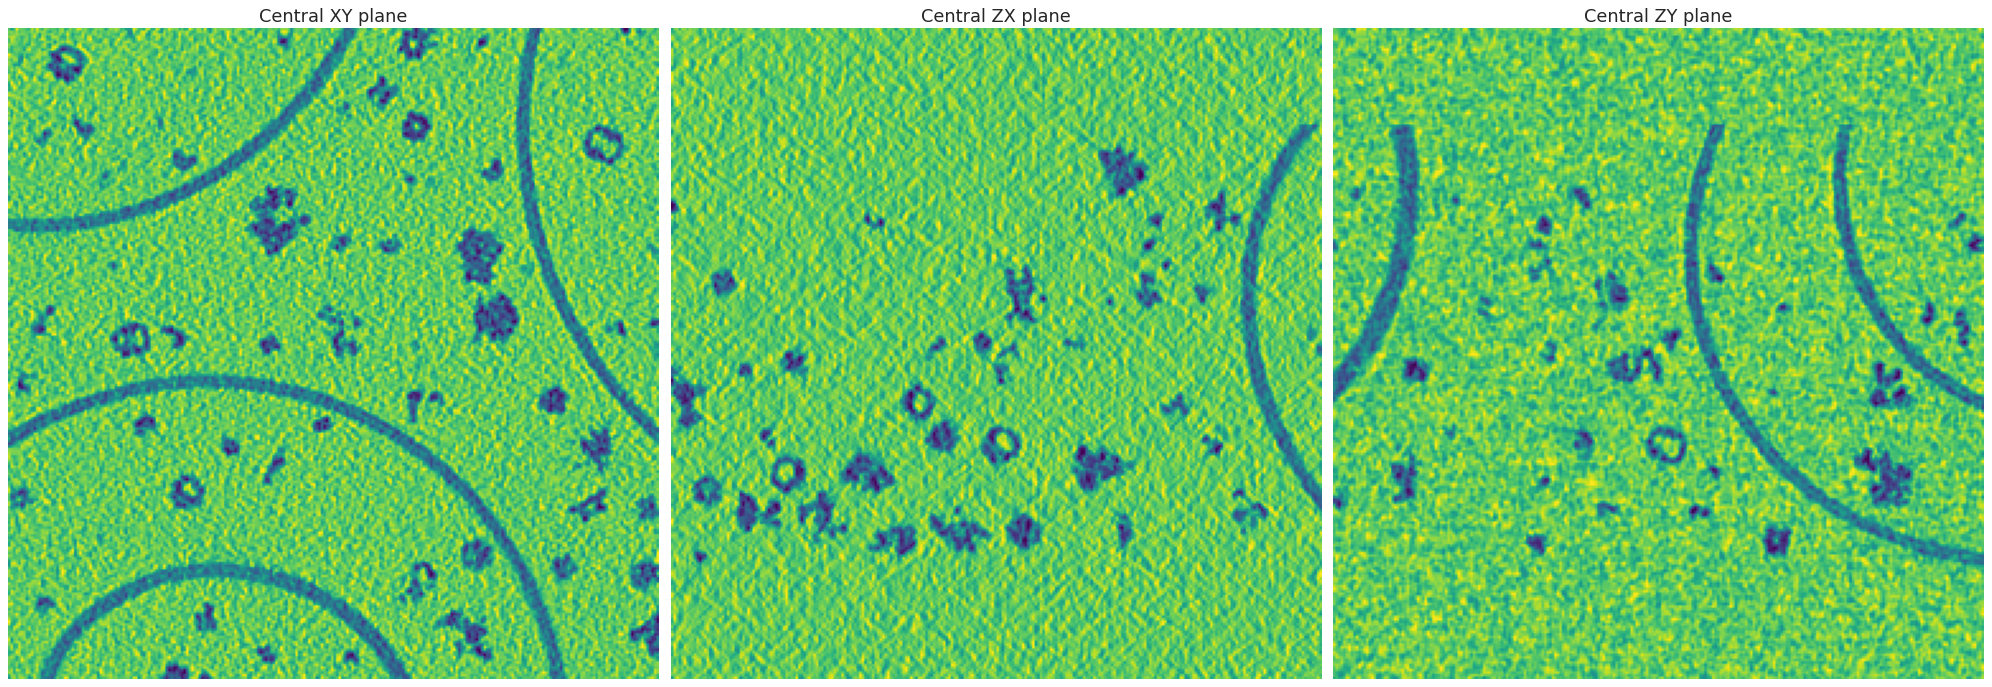

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [20]:
plot_centralSlices(raw-denoised, True)

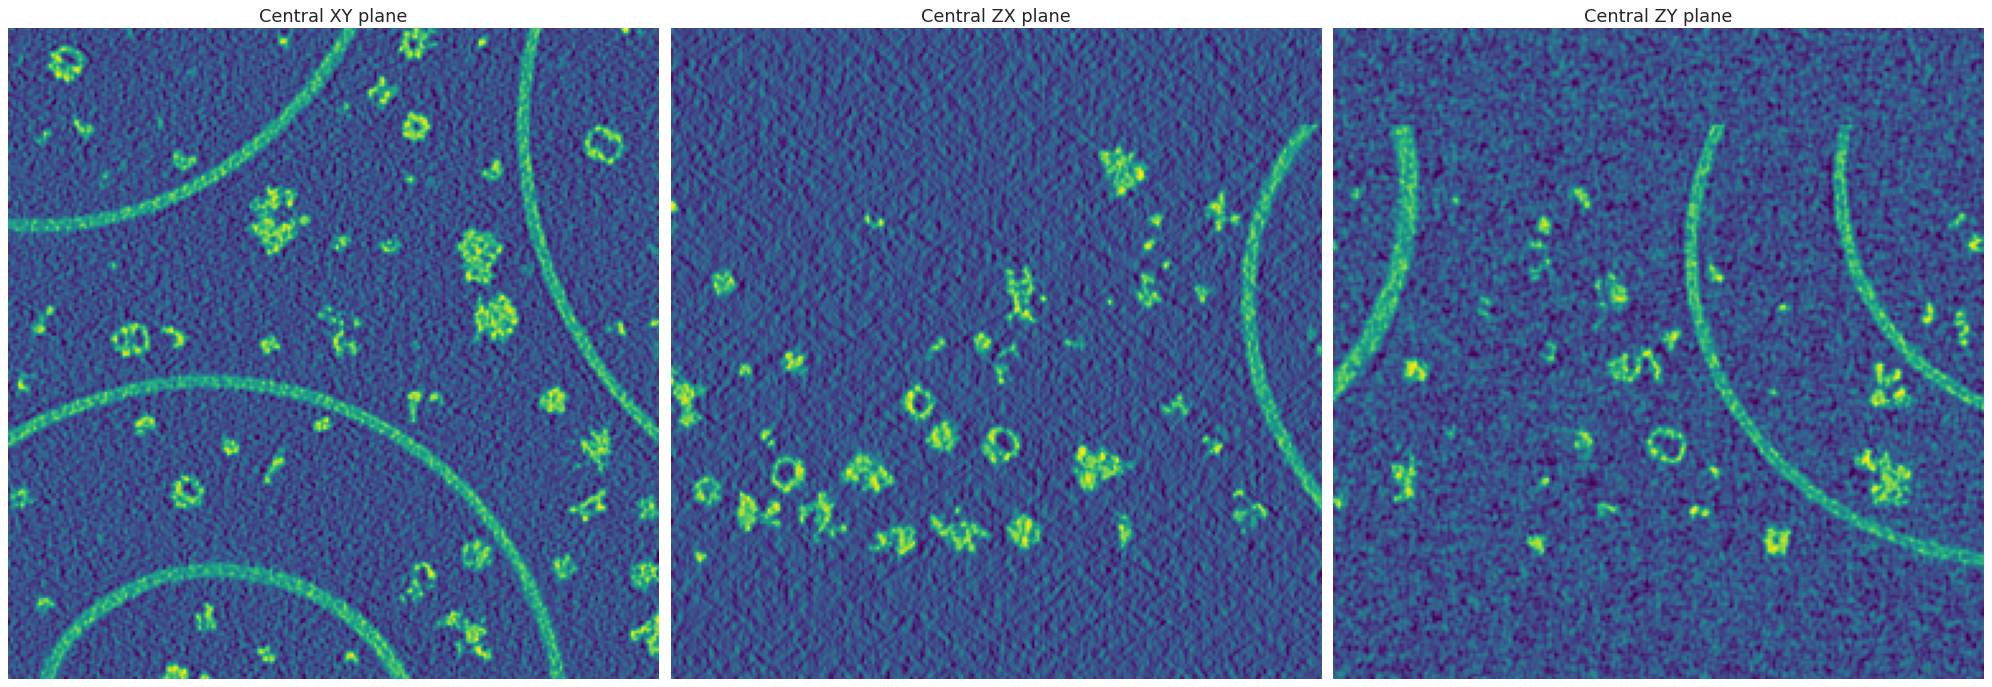

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [21]:
plot_centralSlices(denoised-raw, True)